In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 4. 행렬 계산

## 1) 해의 존재성 여부 판단

### (1) 행렬의 정칙성
 - 행렬 A가 정방행렬인가? : 이는 변환전 공간과 변환 후 공간의 차원 동일성을 보장한다.
 - 행렬 A가 Full-Rank인가? : 이는 변환후 공간의 차원을 열공간 Im(A)가 모두 차지했음을 보장하고, 또한 변환전 공간의 영공간 ker(A)가 0차원임을 보장한다. 

### (2) 해의 성질
### - Ax = y가 해를 갖기위한 조건은, y가 열공간 Im(A)에 속하는 것이다.

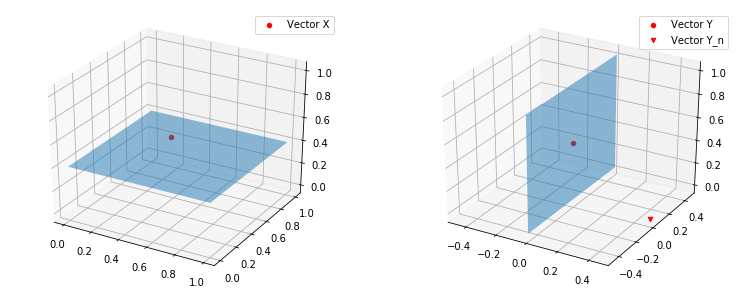

In [135]:
plt.figure(figsize = (20,5))
ax = plt.axes(projection="3d")

fig_1 = plt.subplot(1,3,1,projection="3d")
fig_2 = plt.subplot(1,3,2,projection="3d",xlim=(-0.5,0.5),ylim=(-0.5,0.5))


x = [0,1,1,0]
y = [0,0,1,1]
z = [0.4,0.4,0.4,0.4]

verts = [list(zip(x,y,z))]

fig_1.set_alpha = 0.5
fig_1.set_facecolor = "C0"

fig_1.add_collection3d(Poly3DCollection(verts,alpha=0.5,facecolor="C0"))
fig_1.scatter3D(0.5,0.4,0.6,marker="o",c="r",label = "Vector X")


x = [0,0,0,0]
y = [-0.5,-0.5,0.5,0.5]
z = [0,1,1,0]

verts = [list(zip(x,y,z))]

fig_2.set_alpha = 0.5
fig_2.set_facecolor = "C0"

fig_2.add_collection3d(Poly3DCollection(verts,linewidth = 1,alpha=0.5,facecolor="C0"))
fig_2.scatter3D(0,0,0.5,marker="o",c="r",label = "Vector Y",zorder=2)
fig_2.scatter(0.5,0,marker = "v", c = "r",label = "Vector Y_n")



fig_1.legend()
fig_2.legend()
plt.show()

-  위 그림에서, 변환 전 부분공간(3차원에서의 2차원 평면)은 변환 후 열공간(3차원에서의 2차원 평면)으로 선형변환한다. 이 때, y = Vector y_n는 이 부분공간에 속하지 않는다.
-  Ax=y에서 y=vector y_n라면, 이 방정식의 해는 존재하지 않는다.

### - Ax = y에서 해 x가 존재할 때, Az = 0인 영공간의 벡터 z와 x의 결합 x' = x + z도 해가 된다.

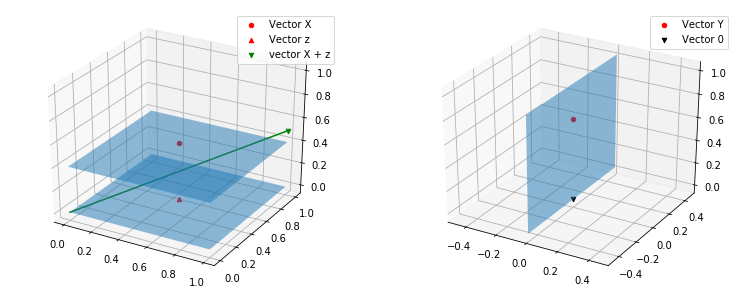

In [136]:
plt.figure(figsize = (20,5))
ax = plt.axes(projection="3d")

fig_1 = plt.subplot(1,3,1,projection="3d")
fig_2 = plt.subplot(1,3,2,projection="3d",xlim=(-0.5,0.5),ylim=(-0.5,0.5))


x = [0,1,1,0]
y = [0,0,1,1]
z = [0.4,0.4,0.4,0.4]

verts_1 = [list(zip(x,y,z))]

x = [0,1,1,0]
y = [0,0,1,1]
z = [0,0,0,0]
verts_2 = [list(zip(x,y,z))]

fig_1.set_alpha = 0.5
fig_1.set_facecolor = "C0"

fig_1.add_collection3d(Poly3DCollection(verts_1,alpha=0.5,facecolor = "C0"))
fig_1.add_collection3d(Poly3DCollection(verts_2,alpha=0.5,facecolor = "C0"))

fig_1.scatter3D(0.5,0.5,0.5,marker="o",c="r",label = "Vector X")
fig_1.scatter3D(0.5,0.5,0,marker="^",c="r",label = "Vector z")

line_x = np.linspace(0,1,1000)
line_y = np.linspace(0,1,1000)
line_z = np.linspace(0,0.5,1000)

fig_1.plot3D(line_x,line_y,line_z,c="g")
fig_1.scatter3D(1,1,0.5,marker="v",c="g",label="vector X + z")

x = [0,0,0,0]
y = [-0.5,-0.5,0.5,0.5]
z = [0,1,1,0]

verts = [list(zip(x,y,z))]

fig_2.set_alpha = 0.5
fig_2.set_facecolor = "C0"

fig_2.add_collection3d(Poly3DCollection(verts,linewidth = 1,alpha=0.5,facecolor="C0"))
fig_2.scatter3D(0,0,0.7,marker="o",c="r",label = "Vector Y",zorder=2)
fig_2.scatter3D(0,0,0,marker="v",c="k",label = "Vector 0")


fig_1.legend()
fig_2.legend()
plt.show()

 - Vector X와, Vector 0로 수렴하는 Vector z를 더한 Vector X + z도 마찬가지로 열공간A의 벡터Y로 수렴한다.
 - Ax = y이고, Az = 0일때, A(x + z) = Ax + Az = y + 0 = y이다.
 - 즉, Vector X + Vector z도 마찬가지로 Vector Y로 수렴함이 보장된다.

### (3) 비정칙 상황에서 해를 구하기

### - 해가 없는 경우

In [160]:
A = np.matrix([[2,-4],[4,-5],[5,-9]])
n = np.matrix([[-2,2,1]])

An = np.hstack([A,n.T])

In [161]:
# Phase 1 : 1행을 1/2배하여 선두를 1로 만들어준다.

A_1 = An[0] * (1/2)
A_2 = An[1]
A_3 = An[2]

An = np.vstack([A_1,A_2,A_3])
print(An)

[[ 1. -2. -1.]
 [ 4. -5.  2.]
 [ 5. -9.  1.]]


In [162]:
# Phase 2 : 1행을 -4배, -5배하여 각각 2행, 3행에 더해준다.

A_1 = An[0]
A_2 = An[1] -4 * An[0]
A_3 = An[2] -5 * An[0]

An = np.vstack([A_1,A_2,A_3])
print(An)

[[ 1. -2. -1.]
 [ 0.  3.  6.]
 [ 0.  1.  6.]]


In [163]:
# Phase 3 : 2행을 (1/3)배한다.

A_1 = An[0]
A_2 = An[1] * (1/3)
A_3 = An[2]

An = np.vstack([A_1,A_2,A_3])
print(An)

[[ 1. -2. -1.]
 [ 0.  1.  2.]
 [ 0.  1.  6.]]


In [164]:
# Phase 4 : 3행에서 2행을 뺀다.

A_1 = An[0]
A_2 = An[1] 
A_3 = An[2] - An[1]

An = np.vstack([A_1,A_2,A_3])
print(An)

[[ 1. -2. -1.]
 [ 0.  1.  2.]
 [ 0.  0.  4.]]


 - 계산결과, 3행은 0 = 4꼴이 도출되었다. 이는 모순이므로 해가 없다.
 - 즉, y = [-2,2,1]은 A의 열공간에 속하지 않는 벡터이다.

### - 해가 많은 경우

In [192]:
A = np.matrix([[-1,2,-1,2],[3,-4,-3,-2]])
n = np.matrix([[6,-4]])

An = np.hstack([A,n.T])

In [193]:
# Phase 1 : 1행을 -1배 한다.

A_1 = An[0] * (-1)
A_2 = An[1]

An = np.vstack([A_1,A_2])
print(An)

[[ 1 -2  1 -2 -6]
 [ 3 -4 -3 -2 -4]]


In [194]:
# Phase 2 : 1행을 (-3)배 해서 2행에 더한다.

A_1 = An[0]
A_2 = An[1] + (-3) * An[0]

An = np.vstack([A_1,A_2])
print(An)

[[ 1 -2  1 -2 -6]
 [ 0  2 -6  4 14]]


In [195]:
# Phase 3 : 2행에 (1/2)를 곱한다.

A_1 = An[0]
A_2 = An[1] * (1/2)

An = np.vstack([A_1,A_2])
print(An)

[[ 1. -2.  1. -2. -6.]
 [ 0.  1. -3.  2.  7.]]


In [196]:
# Phase 4 : 2행에 2를 곱해 1행을 빼준다.

A_1 = An[0] +  2 * An[1]
A_2 = An[1]

An = np.vstack([A_1,A_2])
print(An)

[[ 1.  0. -5.  2.  8.]
 [ 0.  1. -3.  2.  7.]]


 - 1열과 2열은 각각 [0,1]과 [1,0]으로 독립성을 보인다.
 - 3열과 4열은 아직 다 정리가 되지 않았고, 사실 여기서 더 정리가 되진 않는다.

-  위 행렬식을 다시 연립방정식꼴로 복원하면
- An * x -> x1 + -5x3 + 2x4 -8 = 0, 
     그리고 x2 - 3x3 + 2x4 -7 = 0
- 이 때, 두 방정식 모두에서 중복되는 x3와 x4는 어떤 값이 들어가도 상관없다(자유변수), 중요한것은, 각각 독립성을 지니는 Unique한 값인 x1, x2를 x3와 x4의 결합으로 표현하는 것이다.


In [209]:
x = np.matrix(["x1","x2","x3","x4"])
x_3 = np.matrix([-5,2,1,0])
x_4 = np.matrix([-3,2,0,1])
n = np.matrix([8,7,0,0])

- x = [-5,2,1,0] * x_3 + [-3,2,0,1] * x_4 + n 꼴로 궁극적으로 표현이 가능하다.

- 이는 다시 표현하면 영공간의 해가 된다. 즉, 변환된 공간에서 0벡터로 수렴하는 변환전 공간은 
- x = [-5,2,1,0] * x_3 + [-3,2,0,1] * x_4 + n  = [-5*x_3 -3*x_4-8 , 2*x_3 - 2*x_4 - 7, x_3, x_4] 의 Span이 된다.

In [227]:
x = np.matrix(["-5*x_3 -3*x_4-8" , "2*x_3 - 2*x_4 - 7,","x_3", "x_4"])
print(x.T)

# 이 벡터의 Span이 바로 영공간이다. X_3, X_4는 어떤 값이든 집어넣어도 무방하며, X_3, X_4가 전체 실수 공간을 이룬다고 할때
# 4차원 공간에서 선(또는 면?)이 된다.

[['-5*x_3 -3*x_4-8']
 ['2*x_3 - 2*x_4 - 7,']
 ['x_3']
 ['x_4']]
